In [66]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### Loading the data

In [67]:
# Read comma separated data
data = np.loadtxt(os.path.join('ex1data1.txt'), delimiter=',')
xCoords, yCoords = data[:, 0], data[:, 1]

## Plotting the data

We create a function to plot the data. We will also include the axis labels.

Text(0.5, 0, 'Population of City in 10,000s')

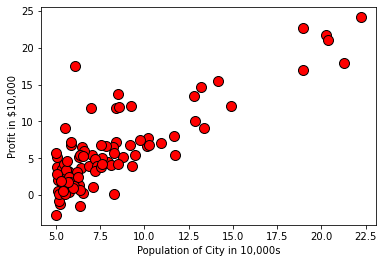

In [68]:
fig = plt.figure()  # open a new figure
plt.plot(xCoords, yCoords, 'ro', ms = '10', mec = 'k') # plotting the coordinates

originalXCoords = xCoords

# Axis Labels
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, we will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of the model are our $\theta_j$ values. These are
the values we will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, our parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


### Define a function to compute the Cost function
We first compute the function h: $$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$
and then compute the cost function. Keep in mind that the $$\theta$$ parameters are arbitrary and will be updated at each run. So our cost function should take xCoords, yCoords

In [69]:
# We insert a column of ones in the first column of the xCoords
xCoords = np.stack([np.ones(yCoords.size), xCoords], axis=1)
print(xCoords)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [70]:
def costFunction(xCoords, yCoords, theta0, theta1):
    ''' Will return the amount of error '''
    
    theta = [theta0, theta1]
    
    # Taking the dot product of the theta values and the x coordinates to find the equation of each line
    predictions = np.dot(xCoords, theta)
    
    # Defining an accumulator to retain the amount of error that is produced
    totalError = 0
    
    m = yCoords.size # number of coordinates
     
    # Calculating the total error produced by the line
    totalError = 1/(2 * m) * np.sum(np.square(predictions - yCoords))
       
    return totalError

In [71]:
print(costFunction(xCoords, yCoords, 1, 1))

10.266520491383504


### Defining a function to compute the gradient descent

In [72]:
def gradientDescent(xCoords, yCoords, theta0, theta1, epoch):
    ''' Will find the line of best fit '''
    
    errors = []
    
    m = yCoords.size
    
    theta = [theta0, theta1]
    
    # Learning Rate
    a = 0.01
    
    # Epoch
    for e in range(epoch):
        
        # Creating an array of our predicted values
        predictions = np.dot(xCoords, theta)
        
        # Updating our current theta values
        theta[0] = theta[0] - a / m * (predictions - yCoords).dot(xCoords)[0]
        theta[1] = theta[1] - a / m * (predictions - yCoords).dot(xCoords)[1]
        
        # We save the error that our line produced on each iteration of e
        errors.append(costFunction(xCoords, yCoords, theta[0] ,theta[1]))
        
    return errors, theta

In [73]:
# Setting our initial theta values
theta0 = 0
theta1 = 0

epoch = 1500

errors, theta = gradientDescent(xCoords, yCoords, theta0, theta1, epoch)
print(errors)

[6.737190464870003, 5.9315935686049555, 5.901154707081388, 5.895228586444221, 5.8900949431173295, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806385, 5.86482686531293, 5.8598278899321805, 5.85484692057229, 5.849883892376587, 5.844938740722034, 5.840011401218361, 5.835101809707226, 5.830209902261388, 5.825335615183863, 5.820478885007099, 5.815639648492154, 5.810817842627869, 5.806013404630044, 5.801226271940628, 5.7964563822269, 5.7917036733806535, 5.7869680835173956, 5.782249550975539, 5.777548014315596, 5.7728634123193805, 5.768195683989213, 5.76354476854712, 5.758910605434047, 5.754293134309077, 5.749692295048628, 5.745108027745684, 5.740540272709012, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333528, 5.713477184364749, 5.709023361800549, 5.704585581648198, 5.7001637861238565, 5.695757917651815, 5.691367918863752, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.673965480401506, 5.6696539767147955, 5.6653580

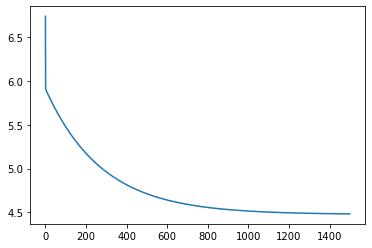

In [74]:
# Plotting the error to see the convergence
fig = plt.figure()  # open a new figure
plt.plot(errors)

Text(0.5, 0, 'Population of City in 10,000s')

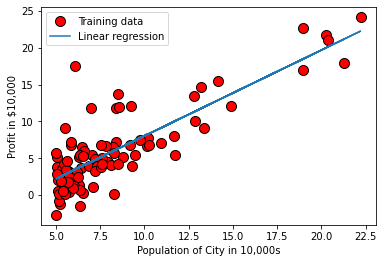

In [75]:
# Plotting the line onto the data

fig = plt.figure()  # open a new figure

# We use originalXCoords because we stacked ones at the start in xCoords
plt.plot(originalXCoords, yCoords, 'ro', ms = '10', mec = 'k') # Plotting the coordinates

plt.plot(xCoords[:, 1], np.dot(xCoords, theta), '-')
plt.legend(['Training data', 'Linear regression']);

# Axis Labels
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')